**ANEXOS 1**





**TESIS:
DESARROLLO DE ALGORITMOS PARA OPTIMIZAR LA PRODUCCION DE LICOPENO EN YARROWIA LIPOLYTICA USANDO HERRAMIENTAS COMPUTACIONALES DE INGENIERIA METABOLICA EN PYTHON**

AUTOR: MILTON GIOVANNI QUINGA SOCASI

**MAESTRÍA EN BIOLOGÍA COMPUTACIONAL**

**PONTIFICIA UNIVERSIDAD CATÓLICA DEL ECUADOR**

DESARROLADO EN JUPYTER NOTEBOOK DE GOOGLE COLAB. 

**PYTHON VERSION 3.8.16**

ENERO 2023

In [3]:
#Para consultar la versión de Python
!python --version

Python 3.8.16


**Instalación de paquetes para Ingeniería Metabólica. Cobrapy y Cameo**

Para importar Computer Aided Metabolic Engineering and Optimization (Cameo).

https://cameo.bio/


In [1]:
#Importar Cameo
!pip install cameo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Para importar Constraint-Based Metabolic Modeling in Python (Cobrapy)


https://cobrapy.readthedocs.io/en/latest/getting_started.html

In [2]:
#Importar Cobrapy
!pip install cobra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**1. Importación del modelo metabólico iYali4 de Yarrowia lipolytica con Cameo**



In [3]:
#Para importar modelos del Internet
from cameo import models

In [4]:
# Para importar el modelo de la University of Minho (http://darwin.di.uminho.pt/models.)
modelyal1 = models.minho. iYali4

Se han truncado las últimas 5000 líneas del flujo de salida.


In [5]:
#Para mostrar un resumen deL modelo metabólico iYali4
modelyal1

Name,yli
Memory address,7fc21cacfbe0
Number of metabolites,1683
Number of reactions,1985
Number of genes,901
Number of groups,93
Objective expression,1.0*2111 - 1.0*2111_reverse_1a0a2
Compartments,"cytoplasm, mitochondrion, cell envelope, vacuolar membrane, endoplasmic reticulum, peroxisome, nucleus, extracellular, endoplasmic reticulum membrane, Golgi, mitochondrial membrane, lipid particle, Golgi membrane, vacuole"


In [9]:
from cobra.summary import summary
#Resumen del modelo 
modelyal1.summary()


Metabolite,Reaction,Flux,C-Number,C-Flux
m1031,1654,0.5065,0,0.00%
m511,1714,0.649,0,0.00%
m342,1832,3.797,0,0.00%
m1339,1992,1.666,0,0.00%
m215,2005,0.02695,0,0.00%
m1113,2060,0.01104,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
m1176,1672,-1.74,0,0.00%
m214,2100,-7.639,0,0.00%
m1401,2111,-0.05664,0,0.00%


Se compone de 1683 metabolitos y 1985 Reacciones

In [10]:
# Para ubicar función objetivo. reacción 2111 biomasa
modelyal1.reactions.get_by_id("2111") #funcion objetivo es la de crecimiento que produce biomasa

Reaction identifier,2111
Name,growth
Memory address,0x7fe27db1aa60
Stoichiometry,m1401 --> biomass_ -->
GPR,
Lower bound,0.0
Upper bound,1000.0


**2. Identificación de las reacciones de la ruta del mevalonato en el modelo metabólico iYali4 de Yarrowia lipolytica**

- Acetoacetil-CoA tiolasa.ERG10

In [11]:
modelyal1.reactions.get_by_id("103")

Reaction identifier,103
Name,acetyl-CoA C-acetyltransferase
Memory address,0x7fe27e1ddc10
Stoichiometry,2.0 m68 <=> m189 + m69 2.0 acetyl-CoA_C23H38N7O17P3S <=> acetoacetyl-CoA_C25H40N7O18P3S + coenzyme A_C21H36N7O16P3S
GPR,YALI0B08536g
Lower bound,-1000.0
Upper bound,1000.0


In [12]:
modelyal1.reactions.get_by_id("104")

Reaction identifier,104
Name,acetyl-CoA C-acetyltransferase
Memory address,0x7fe27e1dda30
Stoichiometry,2.0 m71 <=> m190 + m73 2.0 acetyl-CoA_C23H38N7O17P3S <=> acetoacetyl-CoA_C25H40N7O18P3S + coenzyme A_C21H36N7O16P3S
GPR,YALI0E11099g
Lower bound,-1000.0
Upper bound,1000.0


In [13]:
#Metabolito
modelyal1.metabolites.get_by_id('m190')

Metabolite identifier,m190
Name,acetoacetyl-CoA_C25H40N7O18P3S
Memory address,0x7fe27e6aaeb0
Formula,None
Compartment,C_mi
In 4 reaction(s),"yli0055, 104, R00410, 560"


- HMG-CoA sintasa. ERG13

In [14]:
modelyal1.reactions.get_by_id("560")

Reaction identifier,560
Name,hydroxymethylglutaryl CoA synthase
Memory address,0x7fe27dff11f0
Stoichiometry,m190 + m26 + m71 --> m28 + m648 + m73 acetoacetyl-CoA_C25H40N7O18P3S + H2O_H2O + acetyl-CoA_C23H38N7O17P3S --> H+_p+1 + 3-hydroxy-3-methylglutaryl-CoA_C27H44N7O20P3S + coenzyme A_C21H36N7O16P3S
GPR,YALI0F30481g
Lower bound,0.0
Upper bound,1000.0


- HMG-CoA reductasa. HMG1

In [ ]:
modelyal1.reactions.get_by_id("558")

Reaction identifier,558
Name,hydroxymethylglutaryl CoA reductase
Memory address,0x7f9abf42a5d0
Stoichiometry,2.0 m10 + 2.0 m40 + m646 --> 2.0 m41 + m647 + m69 2.0 H+_p+1 + 2.0 NADPH_C21H30N7O17P3 + 3-hydroxy-3-methylglutaryl-CoA_C27H44N7O20P3S --> 2.0 NADP(+)_C21H28N7O17P3 + (R)-mevalonate_C6H12O4 + coenzyme A_C21H36N7O16P3S
GPR,YALI0E04807g
Lower bound,0.0
Upper bound,1000.0


- Mevalonato quinasa. ERG12

In [ ]:
modelyal1.reactions.get_by_id("735")

Reaction identifier,735
Name,mevalonate kinase (atp)
Memory address,0x7f9abf230f50
Stoichiometry,m141 + m647 --> m10 + m143 + m811 ATP_C10H16N5O13P3 + (R)-mevalonate_C6H12O4 --> H+_p+1 + ADP_C10H15N5O10P2 + (R)-5-phosphomevalonic acid_C6H13O7P
GPR,YALI0B16038g
Lower bound,0.0
Upper bound,1000.0


In [ ]:
#Metabolito
modelyal1.metabolites.get_by_id('m647')

Metabolite identifier,m647
Name,(R)-mevalonate_C6H12O4
Memory address,0x7f9abf9e5990
Formula,None
Compartment,C_cy
In 6 reaction(s),"737, 1096, 735, 736, 738, 558"


- Fosfomevalonato quinasa. ERG8

In [ ]:
modelyal1.reactions.get_by_id("904")

Reaction identifier,904
Name,phosphomevalonate kinase
Memory address,0x7f9abf103b50
Stoichiometry,m141 + m811 --> m143 + m812 ATP_C10H16N5O13P3 + (R)-5-phosphomevalonic acid_C6H13O7P --> ADP_C10H15N5O10P2 + (R)-5-diphosphomevalonic acid_C6H14O10P2
GPR,YALI0E06193g
Lower bound,0.0
Upper bound,1000.0


- Mevalonato pirofosfato descarboxilasa. MVD1

In [ ]:
modelyal1.reactions.get_by_id("739")

Reaction identifier,739
Name,mevalonate pyrophoshate decarboxylase
Memory address,0x7f9abf1c6090
Stoichiometry,m141 + m812 --> m143 + m35 + m491 + m82 ATP_C10H16N5O13P3 + (R)-5-diphosphomevalonic acid_C6H14O10P2 --> ADP_C10H15N5O10P2 + phosphate_H3O4P + isopentenyl diphosphate_C5H12O7P2 + carbon dioxide_CO2
GPR,YALI0F05632g
Lower bound,0.0
Upper bound,1000.0


- Isopentenil difosfato:dimetilalil difosfato isomerasa. IDI1

In [ ]:
modelyal1.reactions.get_by_id("667") 	
#Isopentenyl diphosphate <=> Dimethylallyl diphosphate dimetilalil-pirofosfato (DMAPP) es prenyl diphosphate_C5H9O7P2

Reaction identifier,667
Name,isopentenyl-diphosphate D-isomerase
Memory address,0x7f9abf238f90
Stoichiometry,m491 <=> m492 isopentenyl diphosphate_C5H12O7P2 <=> prenyl diphosphate_C5H9O7P2
GPR,YALI0F04015g
Lower bound,-1000.0
Upper bound,1000.0


- Farnesil pirofosfato sintetasa. ERG20

- ERG20, para producir geranil-difosfato (geranil-PP)

In [ ]:
modelyal1.reactions.get_by_id("355") 

Reaction identifier,355
Name,dimethylallyltranstransferase
Memory address,0x7f9abf509150
Stoichiometry,m491 + m492 --> m203 + m493 isopentenyl diphosphate_C5H12O7P2 + prenyl diphosphate_C5H9O7P2 --> diphosphate_H4O7P2 + geranyl diphosphate_C10H20O7P2
GPR,YALI0E05753g
Lower bound,0.0
Upper bound,1000.0


In [ ]:
#Metabolito
modelyal1.metabolites.get_by_id('m493')

Metabolite identifier,m493
Name,geranyl diphosphate_C10H20O7P2
Memory address,0x7f9abf9ba0d0
Formula,None
Compartment,C_cy
In 2 reaction(s),"462, 355"


- ERG20, para producir farnesil-difosfato (farnesil-PP).

In [ ]:
modelyal1.reactions.get_by_id("462") 

Reaction identifier,462
Name,geranyltranstransferase
Memory address,0x7f9abf3b9310
Stoichiometry,m491 + m493 --> m203 + m512 isopentenyl diphosphate_C5H12O7P2 + geranyl diphosphate_C10H20O7P2 --> diphosphate_H4O7P2 + farnesyl diphosphate_C15H25O7P2
GPR,YALI0E05753g
Lower bound,0.0
Upper bound,1000.0


- Geranilgeranil difosfato sintasa. BTS1

In [ ]:
#Necesito saber donde se produce el geranylgeranyl diphosphate
modelyal1.metabolites.get_by_id('m513') #geranylgeranyl diphosphate

Metabolite identifier,m513
Name,geranylgeranyl diphosphate_C20H36O7P2
Memory address,0x7f9abf9c0050
Formula,None
Compartment,C_cy
In 2 reaction(s),"373, 461"


In [ ]:
modelyal1.reactions.get_by_id("373") 

**3. Adición de vías heterólogas usando los comandos de COBRApy, en el caso de que las vías metabólicas estén ausentes en la levadura**

**3.1. Adición de la reacción:
2 Geranylgeranyl diphosphate <=> 15-cis-Phytoene + 2 Diphosphate**

**La fitoeno sintasa (CrtB, de P. ananatis) condensa dos moléculas de GGPP para formar fitoeno**



In [6]:
#Para crear modelos metabólicos
from cobra import Model, Reaction, Metabolite  

In [7]:
#Creación de la reacción
reactionp = Reaction('R_phytoene')
reactionp.name = '15 cis phytoene-forming'
reactionp.subsystem = '	Carotenoid biosynthesis'
reactionp.lower_bound = -1000.  # This is the default
reactionp.upper_bound = 1000.  # This is the default

In [8]:
reactionp

Reaction identifier,R_phytoene
Name,15 cis phytoene-forming
Memory address,0x7fc21c127370
Stoichiometry,<=> <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [9]:
#Creación de metabolitos
#Diphosphate ya existe: 
modelyal1.metabolites.get_by_id('m203')


Metabolite identifier,m203
Name,diphosphate_H4O7P2
Memory address,0x7fc21c6227c0
Formula,None
Compartment,C_cy
In 74 reaction(s),"852, 568, 461, 1012, 364, 1057, R03531, 910, 313, 1042, 915, 525, 249, 905, 440, 820, 3587, 459, 479, 539, 729, 885, 527, 785, 701, 3536, 373, 1069, 722, 783, 274, 512, 1025, 843, 726, 941, 1066,..."


In [10]:
#Geranylgeranyl diphosphateya existe
modelyal1.metabolites.get_by_id('m513')

Metabolite identifier,m513
Name,geranylgeranyl diphosphate_C20H36O7P2
Memory address,0x7fc21c3d82e0
Formula,None
Compartment,C_cy
In 2 reaction(s),"373, 461"


In [11]:
#Asignación del metabolito GGPP
GGPP_C = modelyal1.metabolites.get_by_id('m513')

In [12]:
GGPP_C

Metabolite identifier,m513
Name,geranylgeranyl diphosphate_C20H36O7P2
Memory address,0x7fc21c3d82e0
Formula,None
Compartment,C_cy
In 2 reaction(s),"373, 461"


In [13]:
#Asignación del metabolito PP
PP_C = modelyal1.metabolites.get_by_id('m203')

In [14]:
PP_C

Metabolite identifier,m203
Name,diphosphate_H4O7P2
Memory address,0x7fc21c6227c0
Formula,None
Compartment,C_cy
In 74 reaction(s),"852, 568, 461, 1012, 364, 1057, R03531, 910, 313, 1042, 915, 525, 249, 905, 440, 820, 3587, 459, 479, 539, 729, 885, 527, 785, 701, 3536, 373, 1069, 722, 783, 274, 512, 1025, 843, 726, 941, 1066,..."


In [15]:
# Creación del metabolito 15-cis-Phytoene
phytoene_c = Metabolite(
    'mphytoene_c',
    formula='C40H64',
    name='15-cis-phytoene',
    compartment='c')

In [16]:
phytoene_c

Metabolite identifier,mphytoene_c
Name,15-cis-phytoene
Memory address,0x7fc21c1274c0
Formula,C40H64
Compartment,c
In 0 reaction(s),


In [17]:
#Adición de los metabolitos a la reacción

reactionp.add_metabolites({
    GGPP_C: -2.0,
    PP_C: 2.0,
    phytoene_c: 1.0
   })

reactionp.reaction  # This gives a string representation of the reaction

'2.0 m513 <=> 2.0 m203 + mphytoene_c'

In [18]:
#Adición de los genes 
reactionp.gene_reaction_rule = '( CrtB )'
reactionp.genes

frozenset({<Gene CrtB at 0x7fc23443acd0>})

In [19]:
#Agregación de la reacción al modelo, que también agregará todos los metabolitos y genes asociados.
modelyal1.add_reactions([reactionp])

In [20]:
#Verificación de la reacción
modelyal1.reactions.get_by_id("R_phytoene")


Reaction identifier,R_phytoene
Name,15 cis phytoene-forming
Memory address,0x7fc21c127370
Stoichiometry,2.0 m513 <=> 2.0 m203 + mphytoene_c 2.0 geranylgeranyl diphosphate_C20H36O7P2 <=> 2.0 diphosphate_H4O7P2 + 15-cis-phytoene
GPR,CrtB
Lower bound,-1000.0
Upper bound,1000.0


In [21]:
#Verificación las reacciones con una optimizacion FBA
solution = modelyal1.optimize()
print(solution)
solution

<Solution 0.057 at 0x7fc21c127910>


,fluxes,reduced_costs
1,0.000000e+00,0.000000e+00
2,0.000000e+00,-9.774922e-19
4,0.000000e+00,-4.336809e-19
5,2.500563e-02,2.775558e-17
6,0.000000e+00,-1.894386e-01
...,...,...
yli0052,0.000000e+00,-8.514095e-03
yli0053,0.000000e+00,-4.336809e-19
yli0054,-2.938966e-18,0.000000e+00
yli0055,-2.938966e-18,-1.387779e-16


**3.2. Adicionamos la reacción: usando como el par de aceptor/reductor: NAD/NADH** 
	
**15-cis-Phytoene + 4 Acceptor <=> Lycopene + 4 Reduced acceptor**

**El fitoeno sufre 4 reacciones de desaturación consecutivas catalizadas por la licopeno sintasa (CrtI, de P. ananatis) para producir licopeno**

In [22]:
#Creción la reacción
reactionl = Reaction('R_LycopeneNAD')
reactionl.name = 'lycopene-formingNAD'
reactionl.subsystem = '	Carotenoid biosynthesis'
reactionl.lower_bound = -1000.  # This is the default
reactionl.upper_bound = 1000.  # This is the defa

In [23]:
reactionl

Reaction identifier,R_LycopeneNAD
Name,lycopene-formingNAD
Memory address,0x7fc21c127d90
Stoichiometry,<=> <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [24]:
#Creación de metabolitos
#15-cis-Phytoene ya existe: 
modelyal1.metabolites.get_by_id('mphytoene_c')

Metabolite identifier,mphytoene_c
Name,15-cis-phytoene
Memory address,0x7fc21c1274c0
Formula,C40H64
Compartment,c
In 1 reaction(s),R_phytoene


In [25]:
# El aceptor es NAD
modelyal1.metabolites.get_by_id('m122')

Metabolite identifier,m122
Name,NAD_C21H27N7O14P2
Memory address,0x7fc21c615850
Formula,None
Compartment,C_cy
In 44 reaction(s),"714, 1231, R00245, yli0031, 891, 443, 472, 988, 1230, yli0004, 731, 235, 565, yli0008, 486, iYL0478, 1092, 323, 998, 1229, 172, 445, 768, yli0027, 1232, yli0006, 691, 320, 770, 470, 163, 61, 765,..."


In [26]:
#Asignación del metabolito
NAD_C= modelyal1.metabolites.get_by_id('m122')


In [27]:
NAD_C

Metabolite identifier,m122
Name,NAD_C21H27N7O14P2
Memory address,0x7fc21c615850
Formula,None
Compartment,C_cy
In 44 reaction(s),"714, 1231, R00245, yli0031, 891, 443, 472, 988, 1230, yli0004, 731, 235, 565, yli0008, 486, iYL0478, 1092, 323, 998, 1229, 172, 445, 768, yli0027, 1232, yli0006, 691, 320, 770, 470, 163, 61, 765,..."


In [28]:
#Creación del metabolito Licopeno
Lycopene_c = Metabolite(
    'mlycopene_c',
    formula='C40H56',
    name='Lycopene',
    compartment='c')



In [29]:
Lycopene_c

Metabolite identifier,mlycopene_c
Name,Lycopene
Memory address,0x7fc21b79d850
Formula,C40H56
Compartment,c
In 0 reaction(s),


In [30]:
# El aceptor reducido es NADH 
modelyal1.metabolites.get_by_id('m123')

Metabolite identifier,m123
Name,NADH_C21H29N7O14P2
Memory address,0x7fc21c615880
Formula,None
Compartment,C_cy
In 38 reaction(s),"714, R00245, yli0031, 891, 443, 472, 988, yli0004, 731, 235, 565, yli0008, 486, iYL0478, 1092, 323, 998, 3532, 172, 445, yli0027, yli0006, 691, 320, 770, 470, 163, 61, yli0026, 696, 2115, yli0042,..."


In [31]:
NADH_C = modelyal1.metabolites.get_by_id('m123')

In [32]:
NADH_C

Metabolite identifier,m123
Name,NADH_C21H29N7O14P2
Memory address,0x7fc21c615880
Formula,None
Compartment,C_cy
In 38 reaction(s),"714, R00245, yli0031, 891, 443, 472, 988, yli0004, 731, 235, 565, yli0008, 486, iYL0478, 1092, 323, 998, 3532, 172, 445, yli0027, yli0006, 691, 320, 770, 470, 163, 61, yli0026, 696, 2115, yli0042,..."


In [33]:
#Adición de los metabolitos a la reacción

reactionl.add_metabolites({
    phytoene_c: -1.0,
    NAD_C: -4.0,
    Lycopene_c: 1.0,
    NADH_C: 4.0
   })

In [34]:
reactionl.reaction 

'4.0 m122 + mphytoene_c <=> 4.0 m123 + mlycopene_c'

In [35]:
#Adición de los genes 
reactionl.gene_reaction_rule = '( CrtI )'
reactionl.genes

frozenset({<Gene CrtI at 0x7fc21c127d00>})

In [36]:
#Agregación de la reacción al modelo, que también agregará todos los metabolitos y genes asociados.
modelyal1.add_reactions([reactionl])

In [37]:
#Verificación de la reacción
modelyal1.reactions.get_by_id("R_LycopeneNAD")

Reaction identifier,R_LycopeneNAD
Name,lycopene-formingNAD
Memory address,0x7fc21c127d90
Stoichiometry,4.0 m122 + mphytoene_c <=> 4.0 m123 + mlycopene_c 4.0 NAD_C21H27N7O14P2 + 15-cis-phytoene <=> 4.0 NADH_C21H29N7O14P2 + Lycopene
GPR,CrtI
Lower bound,-1000.0
Upper bound,1000.0


In [38]:
#Verificación de las reacciones con una optimización
solution1 = modelyal1.optimize()


In [39]:
print(solution1)


<Solution 0.057 at 0x7fc21b79d4f0>


In [40]:
solution1

,fluxes,reduced_costs
1,0.000000,0.000000e+00
2,0.000000,1.243891e-17
4,0.000000,-2.385245e-18
5,0.025006,0.000000e+00
6,0.000000,-1.894386e-01
...,...,...
yli0053,0.000000,4.336809e-19
yli0054,0.000000,0.000000e+00
yli0055,0.000000,0.000000e+00
R_phytoene,0.000000,-0.000000e+00


In [41]:
modelyal1.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
m1031,1654,0.5065,0,0.00%
m511,1714,0.649,0,0.00%
m342,1832,3.797,0,0.00%
m1339,1992,1.666,0,0.00%
m215,2005,0.02695,0,0.00%
m1113,2060,0.01104,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
m1176,1672,-1.74,0,0.00%
m214,2100,-7.639,0,0.00%
m1401,2111,-0.05664,0,0.00%


**3.3. Adicionamos la reacción: usando como el par de aceptor/reductor: NADP/NADPH**

**15-cis-Phytoene + 4 Acceptor <=> Lycopene + 4 Reduced acceptor***

In [42]:
#Creación la reacción
reaction2 = Reaction('R_LycopeneNADP')
reaction2.name = 'lycopene-formingNADP'
reaction2.subsystem = '	Carotenoid biosynthesis'
reaction2.lower_bound = -1000.  # Por default
reaction2.upper_bound = 1000.  # Por default

In [43]:
reaction2

Reaction identifier,R_LycopeneNADP
Name,lycopene-formingNADP
Memory address,0x7fc21a7485e0
Stoichiometry,<=> <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [44]:
#Creación de metabolitos
# El aceptor es NADP
modelyal1.metabolites.get_by_id('m40')

Metabolite identifier,m40
Name,NADPH_C21H30N7O17P3
Memory address,0x7fc21c6098b0
Formula,None
Compartment,C_cy
In 56 reaction(s),"242, 1012, 238, 558, 690, 3529, 219, 236, 889, 466, 234, 1964, 241, 317, 939, 659, iNL2002, 233, 487, 2140, 481, 321, 1027, 2141, yli0003, 688, 231, 671, 1038, R02236, 996, 471, 547, 771, yli0005,..."


In [45]:
#Asignación del aceptor NADP
NADP_C= modelyal1.metabolites.get_by_id('m41')

In [46]:
NADP_C

Metabolite identifier,m41
Name,NADP(+)_C21H28N7O17P3
Memory address,0x7fc21c6098e0
Formula,None
Compartment,C_cy
In 56 reaction(s),"242, 1012, 238, 558, 690, 219, 236, 889, 466, 234, 1963, 241, 317, 939, 659, iNL2002, 233, 487, 2140, 481, 321, 1027, 2141, yli0003, 688, 231, 671, 1038, R02236, 996, 471, 547, yli0005, 80, 173,..."


In [47]:
# El aceptor reducido es NADPH2 
modelyal1.metabolites.get_by_id('m40')

Metabolite identifier,m40
Name,NADPH_C21H30N7O17P3
Memory address,0x7fc21c6098b0
Formula,None
Compartment,C_cy
In 56 reaction(s),"242, 1012, 238, 558, 690, 3529, 219, 236, 889, 466, 234, 1964, 241, 317, 939, 659, iNL2002, 233, 487, 2140, 481, 321, 1027, 2141, yli0003, 688, 231, 671, 1038, R02236, 996, 471, 547, 771, yli0005,..."


In [48]:
#Asignación del aceptor NADP
NADPH_C= modelyal1.metabolites.get_by_id('m40')

In [55]:
NADPH_C

Metabolite identifier,m40
Name,NADPH_C21H30N7O17P3
Memory address,0x7fe27e69d250
Formula,None
Compartment,C_cy
In 56 reaction(s),"80, 771, 1964, 481, 173, 473, 676, yli0007, 237, 233, 164, 471, 487, 1012, 1027, 558, 1038, 678, 3529, 957, 238, 466, 2140, 321, 996, 205, 688, 2141, 15, 1023, yli0003, 344, 939, R02236, 547, 219,..."


In [49]:
#Adición de los metabolitos a la reacción

reaction2.add_metabolites({
    phytoene_c: -1.0,
    NADP_C: -4.0,
    Lycopene_c: 1.0,
    NADPH_C: 4.0
   })

In [50]:
reaction2.reaction 

'4.0 m41 + mphytoene_c <=> 4.0 m40 + mlycopene_c'

In [51]:
#Adición de los genes 
reaction2.gene_reaction_rule = '( CrtI )'
reaction2.genes

frozenset({<Gene CrtI at 0x7fc21b79d820>})

In [52]:
#Agregación de la reacción al modelo
modelyal1.add_reactions([reaction2])

In [53]:
#Verificación de la reacción
modelyal1.reactions.get_by_id("R_LycopeneNADP")

Reaction identifier,R_LycopeneNADP
Name,lycopene-formingNADP
Memory address,0x7fc21a7485e0
Stoichiometry,4.0 m41 + mphytoene_c <=> 4.0 m40 + mlycopene_c 4.0 NADP(+)_C21H28N7O17P3 + 15-cis-phytoene <=> 4.0 NADPH_C21H30N7O17P3 + Lycopene
GPR,CrtI
Lower bound,-1000.0
Upper bound,1000.0


In [54]:
#Verificación de las reacciones con una optimización
solution2 = modelyal1.optimize()

In [55]:
solution2

,fluxes,reduced_costs
1,0.000000,-2.873507e-02
2,0.000000,-2.873507e-02
4,0.000000,-5.854692e-18
5,0.025006,2.775558e-17
6,0.000000,-2.775558e-17
...,...,...
yli0054,0.000000,-0.000000e+00
yli0055,0.000000,-1.105886e-17
R_phytoene,0.000000,-0.000000e+00
R_LycopeneNAD,-0.197224,-0.000000e+00


**3.4. Adicionamos la reacción: usando como el par de aceptor/reductor: FAD/FADH2**

**15-cis-Phytoene + 4 Acceptor <=> Lycopene + 4 Reduced acceptor***

In [56]:
#Creación de la reacción
reaction3 = Reaction('R_LycopeneFAD')
reaction3.name = 'lycopene-formingFAD'
reaction3.subsystem = '	Carotenoid biosynthesis'
reaction3.lower_bound = -1000.  # Por default
reaction3.upper_bound = 1000.  # Por default

In [57]:
reaction3

Reaction identifier,R_LycopeneFAD
Name,lycopene-formingFAD
Memory address,0x7fc21a748d00
Stoichiometry,<=> <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [58]:
#Creación de metabolitos
# El aceptor es FAD
modelyal1.metabolites.get_by_id('m563')

Metabolite identifier,m563
Name,FAD_C27H33N9O15P2
Memory address,0x7fc21c3d8c70
Formula,None
Compartment,C_mi
In 6 reaction(s),"490, yli0053, 940, yli0052, 1790, yli0047"


In [59]:
#Asignación del aceptor NADP
FAD_C= modelyal1.metabolites.get_by_id('m563')

In [60]:
FAD_C

Metabolite identifier,m563
Name,FAD_C27H33N9O15P2
Memory address,0x7fc21c3d8c70
Formula,None
Compartment,C_mi
In 6 reaction(s),"490, yli0053, 940, yli0052, 1790, yli0047"


In [61]:
# El aceptor reducido es FADH2 
modelyal1.metabolites.get_by_id('m566')

Metabolite identifier,m566
Name,FADH2_C27H35N9O15P2
Memory address,0x7fc21c3d8d00
Formula,None
Compartment,C_mi
In 6 reaction(s),"490, yli0053, 1151, 940, yli0052, yli0047"


In [62]:
FADH_C=modelyal1.metabolites.get_by_id('m566')

In [63]:
FADH_C

Metabolite identifier,m566
Name,FADH2_C27H35N9O15P2
Memory address,0x7fc21c3d8d00
Formula,None
Compartment,C_mi
In 6 reaction(s),"490, yli0053, 1151, 940, yli0052, yli0047"


In [64]:
#Adición de los metabolitos a la reacción

reaction3.add_metabolites({
    phytoene_c: -1.0,
    FAD_C: -4.0,
    Lycopene_c: 1.0,
    FADH_C: 4.0
   })

In [65]:
reaction3.reaction

'4.0 m563 + mphytoene_c <=> 4.0 m566 + mlycopene_c'

In [66]:
#Adición de los genes 
reaction3.gene_reaction_rule = '( CrtI )'
reaction3.genes

frozenset({<Gene CrtI at 0x7fc21a748070>})

In [67]:
#Agregación de la reacción al modelo
modelyal1.add_reactions([reaction3])

In [68]:
#Verificación de la reacción
modelyal1.reactions.get_by_id("R_LycopeneFAD")

Reaction identifier,R_LycopeneFAD
Name,lycopene-formingFAD
Memory address,0x7fc21a748d00
Stoichiometry,4.0 m563 + mphytoene_c <=> 4.0 m566 + mlycopene_c 4.0 FAD_C27H33N9O15P2 + 15-cis-phytoene <=> 4.0 FADH2_C27H35N9O15P2 + Lycopene
GPR,CrtI
Lower bound,-1000.0
Upper bound,1000.0


In [69]:
#Verificación de las reacciones con una optimización
solution3 = modelyal1.optimize()

In [70]:
solution3

,fluxes,reduced_costs
1,0.000000,-1.205895e-02
2,0.000000,-1.205895e-02
4,0.000000,1.534442e-17
5,0.041464,0.000000e+00
6,0.000000,0.000000e+00
...,...,...
yli0055,0.000000,-1.033412e-17
R_phytoene,0.000000,-0.000000e+00
R_LycopeneNAD,0.000000,0.000000e+00
R_LycopeneNADP,10.213475,0.000000e+00


**3.5. Adición de la reacción de Demanda de licopeno**



https://cnls.lanl.gov/external/qbio2018/Slides/FBA%202/qBio-FBA-lab-slides.pdf


In [71]:
reactiond = Reaction('LYCO-dem')
reactiond.name = 'Lycopene demand'
reactiond.subsystem = 'Lycopene biosynthesis'
reactiond.lower_bound = 0
reactiond.upper_bound = 1000
reactiond.add_metabolites({Lycopene_c: -1.0})
#modelyal1.add_reaction(reactiond)
modelyal1.add_reactions([reactiond])

In [72]:
#Verificación la reacción
modelyal1.reactions.get_by_id("LYCO-dem")

Reaction identifier,LYCO-dem
Name,Lycopene demand
Memory address,0x7fc21980c3a0
Stoichiometry,mlycopene_c --> Lycopene -->
GPR,
Lower bound,0
Upper bound,1000


In [73]:
#Modificación de la función objetivo

modelyal1.reactions.get_by_id('2111').objective_coefficient = 1.0
modelyal1.reactions.get_by_id('LYCO-dem').objective_coefficient = 1.0


**Se realizó un analisis FBA para verificar la adición de las reacciones heterólogas**

In [74]:
solution4 = modelyal1.optimize()

In [75]:
print(solution4)

<Solution 0.094 at 0x7fc21980cf10>


In [ ]:
solution4

,fluxes,reduced_costs
1,0.000000,-1.205895e-02
2,0.000000,-1.205895e-02
4,0.000000,9.771897e-18
5,0.041464,5.551115e-17
6,0.000000,5.551115e-17
...,...,...
R_phytoene,0.000000,1.586797e-16
R_LycopeneNAD,0.000000,2.100525e-16
R_LycopeneNADP,10.213475,1.050263e-16
R_LycopeneFAD,-10.213475,-0.000000e+00


In [ ]:
modelyal1.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
m1031,1654,0.8399,0,0.00%
m511,1714,0.649,0,0.00%
m342,1832,48.4,0,0.00%
m1339,1992,0.1996,0,0.00%
m215,2005,0.04468,0,0.00%
m1113,2060,0.01831,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
m1176,1672,-0.3215,0,0.00%
m214,2100,-10.1,0,0.00%
m1401,2111,-0.09392,0,0.00%


**4.Optimización de  la producción de licopeno. FBA**

**Para obtener los resultados de salida del FBA en:**

Tasa de crecimiento (biomasa) (1/h)

Tasa de producción de licopeno (mmol/gdcw/h)

Rendimiento de licopeno
(mol/mol glucose)


**4.1. FBA aplicado con todas las reacciones heterólogas y los aceptores/aceptores reducidos (NAD/NADH; NADP/NADPH2, FAD/FADH2)**.

In [76]:
#Para la tasa de recimiento reacción de biomasa
print('Growth Rate (1/h): ' + str(solution4.get_primal_by_id('2111'))) #2111 es la reacción objetivo de producción de biomasa


Growth Rate (1/h): 0.09391512440033381


In [77]:
#Para obtener el valor del flujo de producción de licopeno
print('Lycopene Production Rate (mmol/gdcw/h): ' + str(solution4.get_primal_by_id('LYCO-dem')))


Lycopene Production Rate (mmol/gdcw/h): 0.0


In [78]:
#Para el rendimiento
print('Lycopene Yield (mol/mol glucose): ' +
str(-solution4.get_primal_by_id('LYCO-dem')/solution4.get_primal_by_id('1714')))#1714 es la reaccion de consumo de glucosa

Lycopene Yield (mol/mol glucose): 0.0


**4.2. FBA aplicado con  las reacciones heterólogas y los aceptores/aceptores reducidos NAD/NADH**

In [ ]:
#Para apagar reacciones se modifica los flujos

In [79]:
modelyal1.reactions.get_by_id('R_LycopeneNADP').lower_bound = 0
modelyal1.reactions.get_by_id('R_LycopeneNADP').upper_bound = 0

In [80]:
modelyal1.reactions.get_by_id('R_LycopeneFAD').lower_bound = 0
modelyal1.reactions.get_by_id('R_LycopeneFAD').upper_bound = 0

In [81]:
solution5 = modelyal1.optimize()

In [86]:
solution5

,fluxes,reduced_costs
1,0.000000,-2.274721e-02
2,0.000000,-2.274721e-02
4,0.000000,0.000000e+00
5,0.010534,0.000000e+00
6,0.000000,0.000000e+00
...,...,...
R_phytoene,0.039793,0.000000e+00
R_LycopeneNAD,0.039793,-2.100525e-16
R_LycopeneNADP,0.000000,6.412648e-13
R_LycopeneFAD,0.000000,-2.695965e-02


In [82]:
#Para la tasa de crecimiento reacción de biomasa
print('Growth Rate (1/h): ' + str(solution5.get_primal_by_id('2111')))

Growth Rate (1/h): 0.023858618110880667


In [88]:
#Para obtener el valor del flujo de producción de licopeno
print('Lycopene Production Rate (mmol/gdcw/h): ' + str(solution5.get_primal_by_id('LYCO-dem')))

Lycopene Production Rate (mmol/gdcw/h): 0.03979328587055095


In [89]:
#Para el rendimiento
print('Lycopene Yield (mol/mol glucose): ' +
str(-solution5.get_primal_by_id('LYCO-dem')/solution5.get_primal_by_id('1714')))

Lycopene Yield (mol/mol glucose): 0.0613147702165654


**4.3. FBA aplicado con las reacciones heterólogas y los aceptores/aceptores reducidos NADP/NAPH**

In [83]:
#Para apagar reacciones se modifica los flujos
modelyal1.reactions.get_by_id('R_LycopeneNAD').lower_bound = 0
modelyal1.reactions.get_by_id('R_LycopeneNAD').upper_bound = 0

In [84]:
#Para encender las reacciones nuevamente
modelyal1.reactions.get_by_id('R_LycopeneNADP').lower_bound = -1000
modelyal1.reactions.get_by_id('R_LycopeneNADP').upper_bound = 1000

In [85]:
solution6 = modelyal1.optimize()

In [ ]:
solution6

,fluxes,reduced_costs
1,0.000000,-2.274721e-02
2,0.000000,-2.274721e-02
4,0.000000,-1.084202e-19
5,0.010534,0.000000e+00
6,0.000000,0.000000e+00
...,...,...
R_phytoene,0.039793,-1.586797e-16
R_LycopeneNAD,0.000000,9.692205e-16
R_LycopeneNADP,0.039793,1.050263e-15
R_LycopeneFAD,0.000000,-2.695965e-02


In [86]:
#Para la tasa de crecimiento reacción de biomasa
print('Growth Rate (1/h): ' + str(solution6.get_primal_by_id('2111')))

Growth Rate (1/h): 0.023858618116607805


In [94]:
#Para obtener el valor del flujo de producción de licopeno
print('Lycopene Production Rate (mmol/gdcw/h): ' + str(solution6.get_primal_by_id('LYCO-dem')))

Lycopene Production Rate (mmol/gdcw/h): 0.03979328587048475


In [95]:
#Para el rendimiento
print('Lycopene Yield (mol/mol glucose): ' +
str(-solution6.get_primal_by_id('LYCO-dem')/solution6.get_primal_by_id('1714')))

Lycopene Yield (mol/mol glucose): 0.06131477021646341


**4.4. FBA aplicado con las reacciones heterólogas y los aceptores/aceptores reducidos FAD/FADH2**

In [87]:
#Para apagar reacciones se modifica los flujos
modelyal1.reactions.get_by_id('R_LycopeneNADP').lower_bound = 0
modelyal1.reactions.get_by_id('R_LycopeneNADP').upper_bound = 0

In [88]:
#Para encender las reacciones nuevamente
modelyal1.reactions.get_by_id('R_LycopeneFAD').lower_bound = -1000
modelyal1.reactions.get_by_id('R_LycopeneFAD').upper_bound = 1000

In [89]:
solution7 = modelyal1.optimize()

In [99]:
solution7

,fluxes,reduced_costs
1,0.000000,-2.321455e-02
2,0.000000,-2.321455e-02
4,0.000000,-6.288373e-18
5,0.009931,0.000000e+00
6,0.000000,0.000000e+00
...,...,...
R_phytoene,0.040611,0.000000e+00
R_LycopeneNAD,0.000000,2.751354e-02
R_LycopeneNADP,0.000000,2.751354e-02
R_LycopeneFAD,0.040611,-1.123574e-16


In [100]:
#Para la tasa de crecimiento reacción de biomasa
print('Growth Rate (1/h): ' + str(solution7.get_primal_by_id('2111')))

Growth Rate (1/h): 0.02249364398488282


In [101]:
#Para obtener el valor del flujo de producción de licopeno
print('Lycopene Production Rate (mmol/gdcw/h): ' + str(solution7.get_primal_by_id('LYCO-dem')))

Lycopene Production Rate (mmol/gdcw/h): 0.04061083301561187


In [102]:
#Para el rendimiento
print('Lycopene Yield (mol/mol glucose): ' +
str(-solution7.get_primal_by_id('LYCO-dem')/solution7.get_primal_by_id('1714')))

Lycopene Yield (mol/mol glucose): 0.0625744730594944


**4.5. Visualizacion de flujos con fluxer**
https://fluxer.umbc.edu/

Fluxer es una aplicación web para el cálculo y la visualización interactiva de gráficos de flujo a partir de modelos metabólicos a escala genómica. Los modelos metabllicos deben estar en el formato SBML

Para graficar los flujos metabolicos usando FAD en la reaccion de formacion de licopeno

In [90]:
#Para importr las librerias necesarias para guardar nuestro modelo metablico en SBML
from pathlib import Path
from cobra.io import load_json_model, save_json_model, load_matlab_model, save_matlab_model, read_sbml_model, write_sbml_model
import logging

In [ ]:
#Para guardar el modelo en formato SBML
write_sbml_model(modelyal1, "modelFAD.xml")

**5. Identificación de las reacciones involucradas en el medio de cultivo para el modelo iYali4 de Yarrowia lipolytica**

In [ ]:
# Para chequear el medio 
modelyal1.medium

{'1654': 1000.0,
 '1714': 0.649,
 '1832': 1000.0,
 '1992': 1000.0,
 '2005': 1000.0,
 '2060': 1000.0,
 '2100': 1000.0}

In [ ]:
#Para ver las reacciones del medio
modelyal1.reactions.get_by_id("1654")

Reaction identifier,1654
Name,ammonium exchange
Memory address,0x7f07d7651670
Stoichiometry,m1031 <=> ammonium_H3N <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [ ]:
modelyal1.reactions.get_by_id("1714")

Reaction identifier,1714
Name,D-glucose exchange
Memory address,0x7f47a45c8b80
Stoichiometry,m511 <=> D-glucose_C6H12O6 <=>
GPR,
Lower bound,-0.649
Upper bound,1000.0


In [ ]:
modelyal1.reactions.get_by_id("1832")

Reaction identifier,1832
Name,H+ exchange
Memory address,0x7f47a458c670
Stoichiometry,m342 <=> H+_p+1 <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [ ]:
modelyal1.reactions.get_by_id("1992")

Reaction identifier,1992
Name,oxygen exchange
Memory address,0x7f47a4561fd0
Stoichiometry,m1339 <=> oxygen_O2 <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [ ]:
modelyal1.reactions.get_by_id("2005")

Reaction identifier,2005
Name,phosphate exchange
Memory address,0x7f47a44ec2e0
Stoichiometry,m215 <=> phosphate_H3O4P <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [ ]:
modelyal1.reactions.get_by_id("2060")

Reaction identifier,2060
Name,sulphate exchange
Memory address,0x7f47a450d340
Stoichiometry,m1113 <=> sulphate_H2O4S <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [ ]:
modelyal1.reactions.get_by_id("2100")

Reaction identifier,2100
Name,water exchange
Memory address,0x7f47a4523490
Stoichiometry,m214 <=> H2O_H2O <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


**6. Gráficos de planos de fase de fenotipo (Production envelopes)
Para la optimización con los aceptores/aceptores reducidos FAD/FADH2**


Para la optimización con los aceptores/aceptores reducidos FAD/FADH2

**6.1. Caso del oxígeno**

In [91]:
from cobra.flux_analysis import production_envelope

In [104]:
#Para el oxígeno y producción de licopeno
prod_env1 = production_envelope(
    modelyal1, ["1992"], objective="LYCO-dem", carbon_sources="1714")

In [ ]:
prod_env1.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,1992
0,1714,0.0,NaN,NaN,0.000000,NaN,NaN,-3.894000
1,1714,0.0,NaN,NaN,0.003795,NaN,NaN,-3.689053
2,1714,0.0,NaN,NaN,0.007591,NaN,NaN,-3.484105
3,1714,0.0,NaN,NaN,0.011386,NaN,NaN,-3.279158
4,1714,0.0,NaN,NaN,0.015181,NaN,NaN,-3.074211


In [105]:
#Para el oxígeno y producción de biomasa
prod_env2 = production_envelope(
    modelyal1, ["1992"], objective="2111", carbon_sources="1714")


In [ ]:
prod_env2.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,1992
0,1714,0.0,NaN,NaN,0.00000,NaN,NaN,-3.894000
1,1714,0.0,NaN,NaN,0.00521,NaN,NaN,-3.689053
2,1714,0.0,NaN,NaN,0.01042,NaN,NaN,-3.484105
3,1714,0.0,NaN,NaN,0.01563,NaN,NaN,-3.279158
4,1714,0.0,NaN,NaN,0.02084,NaN,NaN,-3.074211


In [ ]:
# Para graficar
#%matplotlib inline

In [106]:
import matplotlib.pyplot as plt

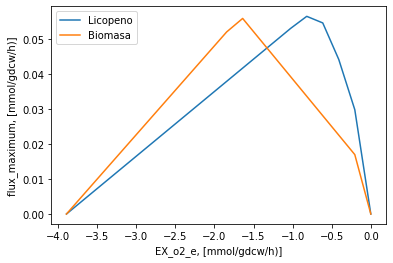

In [107]:
fig, ax = plt.subplots()
ax.plot(prod_env1['1992'],prod_env1['flux_maximum'], label = "Licopeno")
ax.plot(prod_env2['1992'],prod_env2['flux_maximum'], label = "Biomasa")
ax.set_xlabel("EX_o2_e, [mmol/gdcw/h)]")
ax.set_ylabel("flux_maximum, [mmol/gdcw/h)]")
ax.legend(loc = 'upper left')
plt.show()

**6.2. Caso del Nitrógeno**

In [108]:
#Para el nitrógeno y producción de licopeno
prod_env3 = production_envelope(
    modelyal1, ["1654"], objective="LYCO-dem", carbon_sources="1714")

In [ ]:
prod_env3.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,1654
0,1714,0.0,NaN,NaN,0.000000,NaN,NaN,-5.601895
1,1714,0.0,NaN,NaN,0.003546,NaN,NaN,-5.307058
2,1714,0.0,NaN,NaN,0.007091,NaN,NaN,-5.012222
3,1714,0.0,NaN,NaN,0.010637,NaN,NaN,-4.717385
4,1714,0.0,NaN,NaN,0.014182,NaN,NaN,-4.422548


In [109]:
#Para el oxígeno y producción de biomasa
prod_env4 = production_envelope(
    modelyal1, ["1654"], objective="2111", carbon_sources="1714")

In [ ]:
prod_env4

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,1654
0,1714,0.0,NaN,NaN,0.000000,NaN,NaN,-5.601895
1,1714,0.0,NaN,NaN,0.003277,NaN,NaN,-5.307058
2,1714,0.0,NaN,NaN,0.006555,NaN,NaN,-5.012222
3,1714,0.0,NaN,NaN,0.009832,NaN,NaN,-4.717385
4,1714,0.0,NaN,NaN,0.013109,NaN,NaN,-4.422548
5,1714,0.0,NaN,NaN,0.016386,NaN,NaN,-4.127712
6,1714,0.0,NaN,NaN,0.019664,NaN,NaN,-3.832875
7,1714,0.0,NaN,NaN,0.022941,NaN,NaN,-3.538039
8,1714,0.0,NaN,NaN,0.026218,NaN,NaN,-3.243202
9,1714,0.0,NaN,NaN,0.029495,NaN,NaN,-2.948366


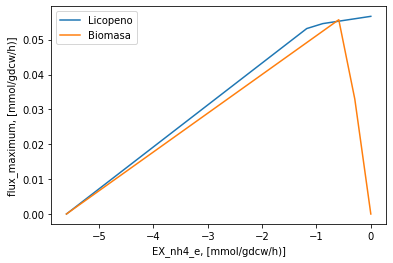

In [110]:
fig, ax = plt.subplots()
ax.plot(prod_env3['1654'],prod_env3['flux_maximum'], label = "Licopeno")
ax.plot(prod_env4['1654'],prod_env4['flux_maximum'], label = "Biomasa")
ax.set_xlabel("EX_nh4_e, [mmol/gdcw/h)]")
ax.set_ylabel("flux_maximum, [mmol/gdcw/h)]")
ax.legend(loc = 'upper left')
plt.show()

**6.3. Biomasa vs Licopeno con Cameo**

In [111]:
from cameo import phenotypic_phase_plane

**Para el oxígeno**

In [112]:
modelyal1.reactions.get_by_id("1992").lower_bound = -1.0
result1 = phenotypic_phase_plane(modelyal1,
                                variables=[modelyal1.reactions.get_by_id("2111")],
                                objective=modelyal1.reactions.get_by_id("LYCO-dem"),
                                points=10)

In [113]:
from cameo.visualization.plotting.with_plotly import PlotlyPlotter

In [114]:
plotter = PlotlyPlotter()

In [115]:
result1.plot(plotter)

In [ ]:
result1.data_frame

,2111,objective_lower_bound,objective_upper_bound,c_yield_lower_bound,c_yield_upper_bound,mass_yield_lower_bound,mass_yield_upper_bound
0,0.000000,0.0,5.668685e-02,NaN,NaN,NaN,NaN
1,0.004288,0.0,5.363604e-02,NaN,NaN,NaN,NaN
2,0.008576,0.0,5.058524e-02,NaN,NaN,NaN,NaN
3,0.012865,0.0,4.753443e-02,NaN,NaN,NaN,NaN
4,0.017153,0.0,4.448363e-02,NaN,NaN,NaN,NaN
5,0.021441,0.0,4.140362e-02,NaN,NaN,NaN,NaN
6,0.025729,0.0,3.676229e-02,NaN,NaN,NaN,NaN
7,0.030018,0.0,3.140741e-02,NaN,NaN,NaN,NaN
8,0.034306,0.0,1.570370e-02,NaN,NaN,NaN,NaN
9,0.038594,0.0,1.016529e-15,NaN,NaN,NaN,NaN


**Para el nitrógeno**

In [116]:
modelyal1.reactions.get_by_id("1654").lower_bound = -0.8
result2 = phenotypic_phase_plane(modelyal1,
                                variables=[modelyal1.reactions.get_by_id("2111")],
                                objective=modelyal1.reactions.get_by_id("LYCO-dem"),
                                points=10)

In [117]:
result2.plot(plotter)

In [ ]:
result2.data_frame

,2111,objective_lower_bound,objective_upper_bound,c_yield_lower_bound,c_yield_upper_bound,mass_yield_lower_bound,mass_yield_upper_bound
0,0.000000,0.0,5.668685e-02,NaN,NaN,NaN,NaN
1,0.004287,0.0,5.363679e-02,NaN,NaN,NaN,NaN
2,0.008574,0.0,5.058673e-02,NaN,NaN,NaN,NaN
3,0.012862,0.0,4.753668e-02,NaN,NaN,NaN,NaN
4,0.017149,0.0,4.448662e-02,NaN,NaN,NaN,NaN
5,0.021436,0.0,4.140743e-02,NaN,NaN,NaN,NaN
6,0.025723,0.0,3.676980e-02,NaN,NaN,NaN,NaN
7,0.030010,0.0,3.143352e-02,NaN,NaN,NaN,NaN
8,0.034297,0.0,1.573453e-02,NaN,NaN,NaN,NaN
9,0.038585,0.0,-6.988624e-15,NaN,NaN,NaN,NaN


**7. Ensayos con sobre expresión de genes de la via del mevalonato**

**7.1. Sobreexpresión del gen HMG1**

**Para todas la reacciones que se necesita sobre expresar aplicamos FVA**


In [92]:
from cobra.flux_analysis import flux_variability_analysis

In [93]:
reactions_OE = [modelyal1.reactions.get_by_id('558'),modelyal1.reactions.get_by_id('739'),modelyal1.reactions.get_by_id('904'),modelyal1.reactions.get_by_id('R_phytoene' ),modelyal1.reactions.get_by_id('R_LycopeneFAD') ]
fva = flux_variability_analysis(modelyal1, reaction_list = reactions_OE,
fraction_of_optimum=0.9)



In [94]:
print (fva)

                minimum   maximum
558            0.015072  0.451429
739            0.015072  0.451429
904            0.015072  0.451429
R_phytoene     0.000981  0.056423
R_LycopeneFAD  0.000981  0.056423


In [95]:
#Sobreexpresión del gen HMG1
hmg1= modelyal1.reactions.get_by_id('558').lower_bound = 0.45

In [96]:
hmg1fba= modelyal1.optimize()

In [97]:
hmg1fba

,fluxes,reduced_costs
1,0.000000,-9.480500e-03
2,0.000000,-9.480500e-03
4,0.000000,1.062518e-17
5,0.000277,0.000000e+00
6,0.000000,-5.551115e-17
...,...,...
R_phytoene,0.056240,-3.173594e-16
R_LycopeneNAD,0.000000,1.123615e-02
R_LycopeneNADP,0.000000,1.123615e-02
R_LycopeneFAD,0.056240,1.123574e-16


In [98]:
#Para la tasa de crecimiento reacción de biomasa
print('Growth Rate (1/h): ' + str(hmg1fba.get_primal_by_id('2111')))

Growth Rate (1/h): 0.0006283337770198694


In [99]:
#Para obtener el valor del flujo de producción de licopeno
print('Lycopene Production Rate (mmol/gdcw/h): ' + str(hmg1fba.get_primal_by_id('LYCO-dem')))

Lycopene Production Rate (mmol/gdcw/h): 0.0562398299465686


In [100]:
#Para el rendimiento
print('Lycopene Yield (mol/mol glucose): ' +
str(-hmg1fba.get_primal_by_id('LYCO-dem')/hmg1fba.get_primal_by_id('1714')))

Lycopene Yield (mol/mol glucose): 0.08665613242922743


In [101]:
#Para quitar la sobre-expresion

modelyal1.reactions.get_by_id('558').lower_bound = -1000

**7.2. Sobreexpresión del gen MVD1**

In [102]:
#Sobreexpresión del gen MVD1
mvd1= modelyal1.reactions.get_by_id('739').lower_bound = 0.45

In [103]:
mvd1fba= modelyal1.optimize()

In [104]:
mvd1fba

,fluxes,reduced_costs
1,0.000000,-9.480473e-03
2,0.000000,-9.480473e-03
4,0.000000,6.505213e-18
5,0.000277,0.000000e+00
6,0.000000,0.000000e+00
...,...,...
R_phytoene,0.056240,0.000000e+00
R_LycopeneNAD,0.000000,1.123612e-02
R_LycopeneNADP,0.000000,1.123612e-02
R_LycopeneFAD,0.056240,-1.123574e-16


In [105]:
#Para la tasa de crecimiento reacción de biomasa
print('Growth Rate (1/h): ' + str(mvd1fba.get_primal_by_id('2111')))

Growth Rate (1/h): 0.0006283319981628091


In [106]:
#Para obtener el valor del flujo de producción de licopeno
print('Lycopene Production Rate (mmol/gdcw/h): ' + str(mvd1fba.get_primal_by_id('LYCO-dem')))

Lycopene Production Rate (mmol/gdcw/h): 0.05623982997536073


In [107]:
#Para el rendimiento
print('Lycopene Yield (mol/mol glucose): ' +
str(-mvd1fba.get_primal_by_id('LYCO-dem')/mvd1fba.get_primal_by_id('1714')))

Lycopene Yield (mol/mol glucose): 0.08665613247359126


In [108]:
#Para quitar la sobre-expresion

modelyal1.reactions.get_by_id('739').lower_bound = -1000

**7.3. Sobreexpresión del gen ERG8**

In [109]:
#Sobreexpresión del gen ERG8
erg1= modelyal1.reactions.get_by_id('904').lower_bound = 0.45

In [110]:
erg1fba= modelyal1.optimize()

In [111]:
erg1fba

,fluxes,reduced_costs
1,0.000000,-9.480473e-03
2,0.000000,-9.480473e-03
4,0.000000,-4.445229e-18
5,0.000277,0.000000e+00
6,0.000000,-5.551115e-17
...,...,...
R_phytoene,0.056240,-1.586797e-16
R_LycopeneNAD,0.000000,1.123612e-02
R_LycopeneNADP,0.000000,1.123612e-02
R_LycopeneFAD,0.056240,1.123574e-16


In [112]:
#Para la tasa de crecimiento reacción de biomasa
print('Growth Rate (1/h): ' + str(erg1fba.get_primal_by_id('2111')))

Growth Rate (1/h): 0.0006283319981619153


In [137]:
#Para obtener el valor del flujo de producción de licopeno
print('Lycopene Production Rate (mmol/gdcw/h): ' + str(erg1fba.get_primal_by_id('LYCO-dem')))

Lycopene Production Rate (mmol/gdcw/h): 0.05623982997536076


In [138]:
#Para el rendimiento
print('Lycopene Yield (mol/mol glucose): ' +
str(-erg1fba.get_primal_by_id('LYCO-dem')/erg1fba.get_primal_by_id('1714')))

Lycopene Yield (mol/mol glucose): 0.08665613247359132


In [113]:
#Para quitar la sobre-expresion

modelyal1.reactions.get_by_id('904').lower_bound = -1000

**7.4. Sobreexpresión del gen CrtB**

In [114]:
#Sobreexpresión del gen CrtB
crtb= modelyal1.reactions.get_by_id('R_phytoene').lower_bound = 0.05


In [115]:
crtbfba= modelyal1.optimize()

In [ ]:
crtbfba

,fluxes,reduced_costs
1,0.00000,-9.417208e-03
2,0.00000,-9.417208e-03
4,0.00000,4.607859e-18
5,0.00415,0.000000e+00
6,0.00000,0.000000e+00
...,...,...
R_phytoene,0.05000,-8.112109e-01
R_LycopeneNAD,0.00000,1.116113e-02
R_LycopeneNADP,0.00000,1.116113e-02
R_LycopeneFAD,0.05000,0.000000e+00


In [142]:
#Para la tasa de crecimiento reacción de biomasa
print('Growth Rate (1/h): ' + str(crtbfba.get_primal_by_id('2111')))

Growth Rate (1/h): 0.009399070752477737


In [143]:
#Para obtener el valor del flujo de producción de licopeno
print('Lycopene Production Rate (mmol/gdcw/h): ' + str(crtbfba.get_primal_by_id('LYCO-dem')))

Lycopene Production Rate (mmol/gdcw/h): 0.05000000000000001


In [144]:
#Para el rendimiento
print('Lycopene Yield (mol/mol glucose): ' +
str(-crtbfba.get_primal_by_id('LYCO-dem')/crtbfba.get_primal_by_id('1714')))

Lycopene Yield (mol/mol glucose): 0.07704160246533129


In [116]:
#Para quitar la sobre-expresion

modelyal1.reactions.get_by_id('R_phytoene').lower_bound = -1000

**7.5. Sobreexpresión del gen Crtl**

In [117]:
#Sobreexpresión del gen Crtl
crtl= modelyal1.reactions.get_by_id('R_LycopeneFAD').lower_bound = 0.05

In [118]:
crtlfba= modelyal1.optimize()

In [119]:
crtlfba

,fluxes,reduced_costs
1,0.00000,-9.417208e-03
2,0.00000,-9.417208e-03
4,0.00000,5.963112e-19
5,0.00415,-5.551115e-17
6,0.00000,-5.551115e-17
...,...,...
R_phytoene,0.05000,0.000000e+00
R_LycopeneNAD,0.00000,-8.000497e-01
R_LycopeneNADP,0.00000,-8.000497e-01
R_LycopeneFAD,0.05000,-8.112109e-01


In [149]:
#Para la tasa de crecimiento reacción de biomasa
print('Growth Rate (1/h): ' + str(crtlfba.get_primal_by_id('2111')))

Growth Rate (1/h): 0.009399070752478558


In [150]:
#Para obtener el valor del flujo de producción de licopeno
print('Lycopene Production Rate (mmol/gdcw/h): ' + str(crtlfba.get_primal_by_id('LYCO-dem')))

Lycopene Production Rate (mmol/gdcw/h): 0.05000000000000001


In [151]:
#Para el rendimiento
print('Lycopene Yield (mol/mol glucose): ' +
str(-crtlfba.get_primal_by_id('LYCO-dem')/crtlfba.get_primal_by_id('1714')))

Lycopene Yield (mol/mol glucose): 0.07704160246533129


In [120]:
#Para quitar la sobre-expresion

modelyal1.reactions.get_by_id('R_LycopeneFAD').lower_bound = -1000

**7.6. Sobreexpresión de los genes HMG1 y CrtB**

In [121]:
#Sobreexpresión del gen HMG1 y CrtB
hmg1= modelyal1.reactions.get_by_id('558').lower_bound = 0.45
crtb= modelyal1.reactions.get_by_id('R_phytoene').lower_bound = 0.05

In [122]:
hmg1crtbfba= modelyal1.optimize()

In [123]:
hmg1crtbfba

,fluxes,reduced_costs
1,0.000000,-9.480471e-03
2,0.000000,-9.480471e-03
4,0.000000,2.927346e-18
5,0.000277,0.000000e+00
6,0.000000,-5.551115e-17
...,...,...
R_phytoene,0.056240,0.000000e+00
R_LycopeneNAD,0.000000,1.123611e-02
R_LycopeneNADP,0.000000,1.123611e-02
R_LycopeneFAD,0.056240,1.123574e-16


In [155]:
#Para la tasa de crecimiento reacción de biomasa
print('Growth Rate (1/h): ' + str(hmg1crtbfba.get_primal_by_id('2111')))

Growth Rate (1/h): 0.0006283318523955233


In [156]:
#Para obtener el valor del flujo de producción de licopeno
print('Lycopene Production Rate (mmol/gdcw/h): ' + str(hmg1crtbfba.get_primal_by_id('LYCO-dem')))

Lycopene Production Rate (mmol/gdcw/h): 0.05623982997772006


In [157]:
#Para el rendimiento
print('Lycopene Yield (mol/mol glucose): ' +
str(-hmg1crtbfba.get_primal_by_id('LYCO-dem')/hmg1crtbfba.get_primal_by_id('1714')))

Lycopene Yield (mol/mol glucose): 0.0866561324772266


In [124]:
#Para quitar la sobre-expresion del gen CrtB 

modelyal1.reactions.get_by_id('R_phytoene').lower_bound = -1000

**7.7. Visualización de flujos con fluxer**
https://fluxer.umbc.edu/

Para graficar los flujos metabolicós con la sobreexpresión del gen HMG1

In [ ]:
write_sbml_model(modelyal1, "modelHMG1.xml")

**8. Gráficos de planos de fase de fenotipo (Production envelopes) Para la optimización con los aceptores/aceptores reducidos FAD/FADH2 y con la sobreexpresión del gen HMG1)**


Para la optimización con los aceptores/aceptores reducidos FAD/FADH2 y con la sobreexpresión del gen HMG1

**8.1. Caso del oxígeno**

In [125]:
#Para importar la librería de Cobrapy para desarrollar los gráficos de plano de fase
from cobra.flux_analysis import production_envelope #para cada analisis de debe instalar nuevamente

In [126]:
#Para el oxígeno y producción de licopeno 
#id O2:1992
#id Glucosa: 1714 
prod_env5 = production_envelope(
    modelyal1, ["1992"], objective="LYCO-dem", carbon_sources="1714")

In [127]:
prod_env5.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,1992
0,1714,0.056250,NaN,NaN,0.056250,NaN,NaN,-0.856500
1,1714,0.046801,NaN,NaN,0.056600,NaN,NaN,-0.837601
2,1714,0.037351,NaN,NaN,0.056556,NaN,NaN,-0.818703
3,1714,0.027902,NaN,NaN,0.056382,NaN,NaN,-0.799804
4,1714,0.018453,NaN,NaN,0.055367,NaN,NaN,-0.780905


In [128]:
#Para el oxígeno y producción de biomasa
#id O2:1992
#id Glucosa: 1714
#id de biomasa: 2111
prod_env6 = production_envelope(
    modelyal1, ["1992"], objective="2111", carbon_sources="1714")

In [129]:
prod_env6.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,1992
0,1714,0.0,NaN,NaN,0.000000,NaN,NaN,-0.856500
1,1714,0.0,NaN,NaN,0.000491,NaN,NaN,-0.837601
2,1714,0.0,NaN,NaN,0.000752,NaN,NaN,-0.818703
3,1714,0.0,NaN,NaN,0.000923,NaN,NaN,-0.799804
4,1714,0.0,NaN,NaN,0.001095,NaN,NaN,-0.780905


In [131]:
# Para graficar
import matplotlib.pyplot as plt

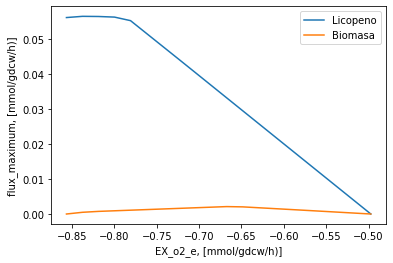

In [132]:
fig, ax = plt.subplots()
ax.plot(prod_env5['1992'],prod_env5['flux_maximum'], label = "Licopeno")
ax.plot(prod_env6['1992'],prod_env6['flux_maximum'], label = "Biomasa")
ax.set_xlabel("EX_o2_e, [mmol/gdcw/h)]")
ax.set_ylabel("flux_maximum, [mmol/gdcw/h)]")
ax.legend(loc = 'upper right')
plt.show()

**8.2. Caso del Nitrógeno**

In [133]:
#Para el nitrógeno y producción de licopeno
#id NH4:1654
#id Glucosa: 1714
prod_env7 = production_envelope(
    modelyal1, ["1654"], objective="LYCO-dem", carbon_sources="1714")

In [134]:
prod_env7.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,1654
0,1714,0.0,NaN,NaN,0.000000,NaN,NaN,-0.647158
1,1714,0.0,NaN,NaN,0.004148,NaN,NaN,-0.613097
2,1714,0.0,NaN,NaN,0.008297,NaN,NaN,-0.579036
3,1714,0.0,NaN,NaN,0.012445,NaN,NaN,-0.544975
4,1714,0.0,NaN,NaN,0.016594,NaN,NaN,-0.510914


In [135]:
#Para el oxígeno y producción de biomasa
#id NH4:1654
#id Glucosa: 1714
#id Biomasa: 2111
prod_env8 = production_envelope(
    modelyal1, ["1654"], objective="2111", carbon_sources="1714")

In [136]:
prod_env8

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,1654
0,1714,0.0,NaN,NaN,0.000000,NaN,NaN,-0.647158
1,1714,0.0,NaN,NaN,0.000119,NaN,NaN,-0.613097
2,1714,0.0,NaN,NaN,0.000238,NaN,NaN,-0.579036
3,1714,0.0,NaN,NaN,0.000357,NaN,NaN,-0.544975
4,1714,0.0,NaN,NaN,0.000476,NaN,NaN,-0.510914
5,1714,0.0,NaN,NaN,0.000595,NaN,NaN,-0.476853
6,1714,0.0,NaN,NaN,0.000714,NaN,NaN,-0.442792
7,1714,0.0,NaN,NaN,0.000833,NaN,NaN,-0.408731
8,1714,0.0,NaN,NaN,0.000952,NaN,NaN,-0.374670
9,1714,0.0,NaN,NaN,0.001071,NaN,NaN,-0.340609


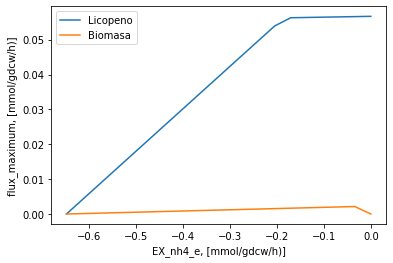

In [137]:
fig, ax = plt.subplots()
ax.plot(prod_env7['1654'],prod_env7['flux_maximum'], label = "Licopeno")
ax.plot(prod_env8['1654'],prod_env8['flux_maximum'], label = "Biomasa")
ax.set_xlabel("EX_nh4_e, [mmol/gdcw/h)]")
ax.set_ylabel("flux_maximum, [mmol/gdcw/h)]")
ax.legend(loc = 'upper left')
plt.show()

**8.3 Biomasa vs Licopeno con Cameo**

In [ ]:
#Para importar la librería de Cameo para desarrollar los gráficos de plano de fase
from cameo import phenotypic_phase_plane

**Para el oxígeno**

In [ ]:
#Para general del dataframe
modelyal1.reactions.get_by_id("1992").lower_bound = -0.8
result1 = phenotypic_phase_plane(modelyal1,
                                variables=[modelyal1.reactions.get_by_id("2111")],
                                objective=modelyal1.reactions.get_by_id("LYCO-dem"),
                                points=10)

In [ ]:
#Para obtenr el gráfico
from cameo.visualization.plotting.with_plotly import PlotlyPlotter

In [ ]:
plotter = PlotlyPlotter()

In [ ]:
result1.plot(plotter)

In [ ]:
result1.data_frame

,2111,objective_lower_bound,objective_upper_bound,c_yield_lower_bound,c_yield_upper_bound,mass_yield_lower_bound,mass_yield_upper_bound
0,0.000000,0.0,5.668685e-02,NaN,NaN,NaN,NaN
1,0.000244,0.0,5.651347e-02,NaN,NaN,NaN,NaN
2,0.000487,0.0,5.634010e-02,NaN,NaN,NaN,NaN
3,0.000731,0.0,5.254701e-02,NaN,NaN,NaN,NaN
4,0.000975,0.0,4.378917e-02,NaN,NaN,NaN,NaN
5,0.001218,0.0,3.503134e-02,NaN,NaN,NaN,NaN
6,0.001462,0.0,2.627350e-02,NaN,NaN,NaN,NaN
7,0.001706,0.0,1.751567e-02,NaN,NaN,NaN,NaN
8,0.001950,0.0,8.757835e-03,NaN,NaN,NaN,NaN
9,0.002193,0.0,1.122261e-14,NaN,NaN,NaN,NaN


**Para el nitrógeno**

In [ ]:
modelyal1.reactions.get_by_id("1654").lower_bound = -0.2
result2 = phenotypic_phase_plane(modelyal1,
                                variables=[modelyal1.reactions.get_by_id("2111")],
                                objective=modelyal1.reactions.get_by_id("LYCO-dem"),
                                points=10)

In [ ]:
result2.plot(plotter)

In [ ]:
result2.data_frame

,2111,objective_lower_bound,objective_upper_bound,c_yield_lower_bound,c_yield_upper_bound,mass_yield_lower_bound,mass_yield_upper_bound
0,0.000000,0.0,5.668685e-02,NaN,NaN,NaN,NaN
1,0.000244,0.0,5.651347e-02,NaN,NaN,NaN,NaN
2,0.000487,0.0,5.634010e-02,NaN,NaN,NaN,NaN
3,0.000731,0.0,5.254701e-02,NaN,NaN,NaN,NaN
4,0.000975,0.0,4.378917e-02,NaN,NaN,NaN,NaN
5,0.001218,0.0,3.503134e-02,NaN,NaN,NaN,NaN
6,0.001462,0.0,2.627350e-02,NaN,NaN,NaN,NaN
7,0.001706,0.0,1.751567e-02,NaN,NaN,NaN,NaN
8,0.001950,0.0,8.757835e-03,NaN,NaN,NaN,NaN
9,0.002193,0.0,-9.127602e-14,NaN,NaN,NaN,NaN


In [138]:
#Para dejar de sobreexpresar el gen HMG1
modelyal1.reactions.get_by_id('558').lower_bound = -1000 


**9. Eliminación de genes (Knockout)**
POX1 al POX6 y GUT2 en Yarrowia lipolytica

**9.1. Para el gen POX1 (acyl-CoA oxidasa)**
id: YALI0D24750g (GPR)

In [139]:
modelyal1.genes.YALI0D24750g.knock_out()

In [140]:
pox1= modelyal1.optimize()

In [141]:
pox1

,fluxes,reduced_costs
1,0.000000,-2.321374e-02
2,0.000000,-2.321374e-02
4,0.000000,4.987330e-18
5,0.009931,0.000000e+00
6,0.000000,0.000000e+00
...,...,...
R_phytoene,0.040611,0.000000e+00
R_LycopeneNAD,0.000000,2.751258e-02
R_LycopeneNADP,0.000000,2.751258e-02
R_LycopeneFAD,0.040611,-3.370723e-16


In [142]:
#Para comprobar la deleccion del gen POX1
modelyal1.reactions.get_by_id("120")

Reaction identifier,120
Name,acyl-CoA oxidase (decanoyl-CoA)
Memory address,0x7fc21c1575b0
Stoichiometry,m195 + m221 --> m222 + m223 decanoyl-CoA_C31H54N7O17P3S + oxygen_O2 --> hydrogen peroxide_H2O2 + trans-dec-2-enoyl-CoA_C31H48N7O17P3S
GPR,YALI0D24750g
Lower bound,0
Upper bound,0


In [143]:
#Para la tasa de crecimiento reacción de biomasa
print('Growth Rate (1/h): ' + str(pox1.get_primal_by_id('2111')))

Growth Rate (1/h): 0.022492866816599188


In [ ]:
#Para obtener el valor del flujo de producción de licopeno
print('Lycopene Production Rate (mmol/gdcw/h): ' + str(pox1.get_primal_by_id('LYCO-dem')))

Lycopene Production Rate (mmol/gdcw/h): 0.04061129849821422


In [ ]:
#Para el rendimiento
print('Lycopene Yield (mol/mol glucose): ' +
str(-pox1.get_primal_by_id('LYCO-dem')/pox1.get_primal_by_id('1714')))

Lycopene Yield (mol/mol glucose): 0.0625751902900065


**9.2. Para el gen GUT2 (glycerol-3-phosphate dehydrogenase) id: YALI0B13970g (GPR)**

In [144]:
modelyal1.genes.YALI0B13970g.knock_out()

In [145]:
gut2= modelyal1.optimize()

In [146]:
gut2

,fluxes,reduced_costs
1,0.000000,-2.321374e-02
2,0.000000,-2.321374e-02
4,0.000000,3.035766e-18
5,0.009931,5.551115e-17
6,0.000000,0.000000e+00
...,...,...
R_phytoene,0.040611,0.000000e+00
R_LycopeneNAD,0.000000,2.751258e-02
R_LycopeneNADP,0.000000,2.751258e-02
R_LycopeneFAD,0.040611,1.123574e-16


In [ ]:
#Para comprobar la deleccion del gen POX1
modelyal1.reactions.get_by_id("490")

Reaction identifier,490
Name,glycerol-3-phosphate dehydrogenase (fad)
Memory address,0x7fb2fc922d60
Stoichiometry,m563 + m564 --> m565 + m566 FAD_C27H33N9O15P2 + glycerol 3-phosphate_C3H9O6P --> dihydroxyacetone phosphate_C3H5O6P + FADH2_C27H35N9O15P2
GPR,YALI0B13970g
Lower bound,0
Upper bound,0


In [ ]:
#Para la tasa de crecimiento reacción de biomasa
print('Growth Rate (1/h): ' + str(gut2.get_primal_by_id('2111')))

Growth Rate (1/h): 0.02249286681659926


In [ ]:
#Para obtener el valor del flujo de producción de licopeno
print('Lycopene Production Rate (mmol/gdcw/h): ' + str(gut2.get_primal_by_id('LYCO-dem')))

Lycopene Production Rate (mmol/gdcw/h): 0.040611298498214474


In [ ]:
#Para el rendimiento
print('Lycopene Yield (mol/mol glucose): ' +
str(-gut2.get_primal_by_id('LYCO-dem')/gut2.get_primal_by_id('1714')))

Lycopene Yield (mol/mol glucose): 0.0625751902900069


**9.3. Visualización de flujos con fluxer**
https://fluxer.umbc.edu/

Para graficar los flujos metabolicós con la eliminacion de los genes POX1 y GUT2

In [147]:
write_sbml_model(modelyal1, "modeldelection.xml")